"""
案例:
    通过代码演示学习率 对 梯度(权重优化)的影响.

结论:
    学习率越小, 梯度下降越慢.
    学习率越大, 梯度下降越快, 可能会越过最小值, 造成震荡, 甚至不收敛(梯度爆炸)
"""

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
# x看成是权重，y看成是loss，下面通过代码来理解学习率的作用
def func(x_t):
    return torch.pow(2*x_t, 2)  # y = 4 x ^2


In [4]:
# 采用较小的学习率，梯度下降的速度慢
# 采用较大的学习率，梯度下降太快越过了最小值点，导致不收敛，甚至震荡
def dm01():

    x = torch.tensor([2.], requires_grad=True)
    # 记录loss迭代次数，画曲线
    iter_rec, loss_rec, x_rec = list(), list(), list()

    # 实验学习率： 0.01 0.02 0.03 0.1 0.2 0.3 0.4
    # lr = 0.01     # 较小的学习率,  会导致梯度下降速度慢
    # lr = 0.1    # 正常的梯度下降
    # lr = 0.125      # 当学习率设置0.125 一下子求出一个最优解
                    # x=0 y=0 在x=0处梯度等于0 x的值x=x-lr*x.grad就不用更新了
                    # 后续再多少次迭代 都固定在最优点

    # lr = 0.2      # x从2.0一下子跨过0点，到了左侧负数区域
    lr = 0.3      # 梯度越来越大 梯度爆炸
    max_iteration = 4
    for i in range(max_iteration):
        y = func(x)   # 得出loss值
        y.backward()  # 计算x的梯度
        print("Iter:{}, X:{:8}, X.grad:{:8}, loss:{:10}".format(
            i, x.detach().numpy()[0], x.grad.detach().numpy()[0], y.item()))
        x_rec.append(x.item())      # 梯度下降点 列表
        # 更新参数
        x.data.sub_(lr * x.grad)    # x = x - x.grad
        x.grad.zero_()
        iter_rec.append(i)          # 迭代次数 列表
        loss_rec.append(y.item())  # 损失值 列表，这里将y改为y.item()以获取标量值
    # 迭代次数-损失值 关系图
    plt.subplot(121).plot(iter_rec, loss_rec, '-ro')
    plt.grid()
    plt.xlabel("Iteration X")
    plt.ylabel("Loss value Y")
    # 函数曲线-下降轨迹 显示图
    x_t = torch.linspace(-3, 3, 100)
    y = func(x_t)
    plt.subplot(122).plot(x_t.detach().numpy(), y.detach().numpy(), label="y = 4*x^2")
    y_rec = [func(torch.tensor(i)).item() for i in x_rec]
    print('x_rec--->', x_rec)
    print('y_rec--->', y_rec)
    # 指定线的颜色和样式（-ro：红色圆圈，b-：蓝色实线等）
    plt.subplot(122).plot(x_rec, y_rec, '-ro')
    plt.grid()
    plt.legend()
    plt.show()


Iter:0, X:     2.0, X.grad:    16.0, loss:      16.0
Iter:1, X:-2.8000001907348633, X.grad:-22.400001525878906, loss:31.360004425048828
Iter:2, X:3.9200005531311035, X.grad:31.360004425048828, loss:61.46561813354492
Iter:3, X:-5.488001346588135, X.grad:-43.90401077270508, loss:120.4726333618164
x_rec---> [2.0, -2.8000001907348633, 3.9200005531311035, -5.488001346588135]
y_rec---> [16.0, 31.360004425048828, 61.46561813354492, 120.4726333618164]


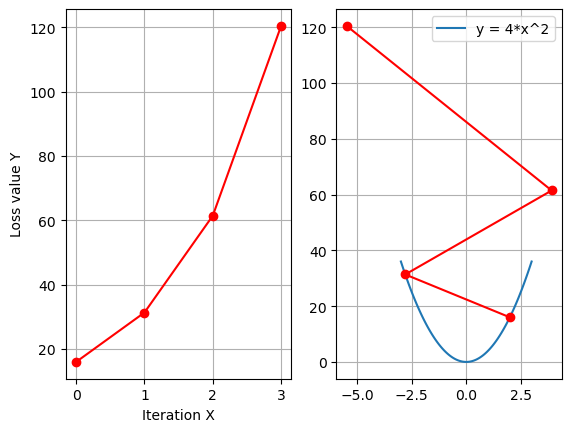

In [5]:
dm01()